 # Data Science 101 - Lead Scoring Scenario

## Part 1: Problem

Today we are going to look at a very common data science problem found in e-commerce and web based software or services (like Xero!). **Lead scoring!**

### The Sales Process

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

1. Individuals land on the website, they might browse the courses, watch some videos and if they are interested they will fill up a form for the course. 

1. Once individuals fill out a form, they have now become a potential customer or **lead**

1. Employees from the sales team will contact leads by emailing or calling them with the goal of getting the lead to sign up for the course - called a **conversion** 

We will be using a consulting model called "SCQA" to help break down the problem.

### Situation

- Currently only 38% of leads contacted go on to become a paying customer. 
- The CEO wants to grow the customer base by 20% over the next year 

### Complication 

- The head of the sales & advertising department has marketing budget to increase advertising and generate 20% more leads, but does not have the headcount to contact every lead already, so more leads would not necessarily mean more conversions
- The department head knows that a conversion rate of 38% means a lot of time and money is wasted on customers who never intended to sign up. 

### Question

- How can data science help to convert more leads with the same or less amount of calls?

### Answer 

- A lead scoring model trained on historical conversion data could help us to prioritise leads and form a better queue to call from 'hottest' lead to 'coldest'

Your idea for a lead scoring model gets approved - now you need to look at the data you and decide what model you are going to build!

## Part 2: Tools

Today we are going to be using a few different tools in our lead scoring scenario:

### Python

In [1]:
# some basic python commands 

# create an array
x = [1, 2, 3, 4, 5]

print(x)

[1, 2, 3, 4, 5]


In [2]:
min(x)

1

In [3]:
max(x)

5

`min`, `max` and `print` are what we call **functions**. These are preprogrammed commands to do common calculations on manipulations. 

### Jupyter Notebook in Google Colab

Jupyter notebook contains **cells** to run each bit of code at a time 

You can run a cell by using `ctrl` + `enter` 

Or because we are hosting the notebook in Google Colab you can click the `play` button at the top of the cell

You can add a new text or code cell using the buttons at the top of the notebook

### Importing packages

To do data science we need to add a bit more functionality than is available in the base python code. 

We do this by importing packages that have extra functions for data analysis, statistics and machine learning.

The data scientists tool kit generally includes the following packages: 

In [4]:
# package for multi-dimensional arrays and matrices
import numpy as np

# package for data manipulation and analysis
import pandas as pd

# packages for creating plots and graphs 
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# ignoring any warnings for this tutorial and you should absolutely ignore warnings forever wait I mean
import warnings
warnings.filterwarnings("ignore")

We use the `import` function to load the extra functions into our python session.

The `as` just shortens the path name of the function so we can call `pd.function_name()` instead of `pandas.function_name()`

## Part 3: Load Data

We use functions from the `pandas` package to load in our data from a csv. Then it's important to check that we have loaded the data correctly! 

Because the datasets are normally too large to parse all at once we can't just browse it like a spreadsheet. We use functions instead to browse the data, looking at the number of records and the content stored in each column. 

It's also very useful to look at the type of data in each column and check for any duplicates or missing/Null values. Doing this up front will save us headaches later. 

In [5]:
# read in the data into a pandas dataframe
leads_df = pd.read_csv('https://raw.githubusercontent.com/hjamau/ds-leadscore-tutorial/master/Leads.csv')

In [6]:
# class of the object
type(leads_df)

pandas.core.frame.DataFrame

In [7]:
# how many rows and columns 
leads_df.shape

(9240, 9)

In [8]:
# top 10 rows of the dataframe head()
leads_df.head(10)

,ProspectID,LeadOrigin,LeadSource,TotalVisits,TotalTime,PageViews,Specialization,Occupation,Converted
0,55e52c85-acf4-4e5d-bd01-d11b9149285a,Landing Page Submission,bing,3,138,3.0,Operations Management,Unemployed,0
1,35a60e02-0d64-431a-9b28-c3167a382503,Landing Page Submission,bing,3,399,3.0,Media and Advertising,Unemployed,1
2,f4d1d5db-58fb-4615-83ed-e7e67bee9a87,API,bing,2,88,1.0,Select,Unemployed,0
3,323869bb-fc3a-4733-bdd3-ab0dda36c0a4,API,bing,1,153,1.0,NaN,Other,0
4,c6ad51b0-8593-4cb3-88e3-f07965f655ad,API,bing,1,458,1.0,NaN,Other,0
5,58afb3e7-62f2-444b-b2e4-afba0d546964,API,bing,3,358,3.0,NaN,Other,0
6,ca1bf6bc-2fcf-4779-bdbe-cbf6f3f4c5e4,Landing Page Submission,bing,4,677,4.0,Business Administration,Other,0
7,984edf60-b0d6-4909-afe5-201ace5ef839,Lead Add Form,bing,15,1108,3.0,Human Resource Management,Unemployed,1
8,ac728b18-04da-4c04-bc89-a3b568d4a40b,Lead Add Form,bing,0,0,0.0,Finance Management,Unemployed,1
9,552b1b02-61c1-4827-ada5-7c8ead795713,Lead Add Form,bing,2,928,2.0,Human Resource Management,Unemployed,1


In [9]:
# bottom 5 rows of the dataframe - tail()
leads_df.tail(5)

,ProspectID,LeadOrigin,LeadSource,TotalVisits,TotalTime,PageViews,Specialization,Occupation,Converted
9235,6a897250-f3b2-41a7-8b5f-69410282a775,Lead Add Form,Youtube Channel,0,0,0.0,Select,Unemployed,1
9236,b787c1d6-9cbc-4c09-a83a-866b09885d07,Lead Add Form,Youtube Channel,0,0,0.0,Select,Unemployed,1
9237,fa959683-971e-44b9-8cb9-5e18adfc363f,Lead Add Form,Youtube Channel,0,0,0.0,Select,Unemployed,1
9238,8c3609e8-f485-4339-87d5-1d62edf0977a,Lead Add Form,Youtube Channel,0,0,0.0,Select,Unemployed,1
9239,47de98bb-95a3-4393-bdd3-3d80d6b67e37,Landing Page Submission,Youtube Channel,4,487,2.0,Business Administration,Other,0


In [10]:
# describe 
leads_df.describe()

,TotalVisits,TotalTime,PageViews,Converted
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,3.394156,487.698268,2.327787,0.385390
std,4.836682,548.021466,2.164258,0.486714
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,0.000000
50%,3.000000,248.000000,2.000000,0.000000
75%,5.000000,936.000000,3.000000,1.000000
max,251.000000,2272.000000,55.000000,1.000000


In [11]:
leads_df.describe(include = 'all')

,ProspectID,LeadOrigin,LeadSource,TotalVisits,TotalTime,PageViews,Specialization,Occupation,Converted
count,9240,9240,9240,9240.000000,9240.000000,9240.000000,7802,9240,9240.000000
unique,9240,5,11,NaN,NaN,NaN,19,4,NaN
top,3a1245fe-808a-43c1-8e03-647a8751df03,Landing Page Submission,Google,NaN,NaN,NaN,Select,Unemployed,NaN
freq,1,4886,2869,NaN,NaN,NaN,1942,5610,NaN
mean,NaN,NaN,NaN,3.394156,487.698268,2.327787,NaN,NaN,0.385390
std,NaN,NaN,NaN,4.836682,548.021466,2.164258,NaN,NaN,0.486714
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000,12.000000,0.000000,NaN,NaN,0.000000
50%,NaN,NaN,NaN,3.000000,248.000000,2.000000,NaN,NaN,0.000000
75%,NaN,NaN,NaN,5.000000,936.000000,3.000000,NaN,NaN,1.000000


In [12]:
# column names
leads_df.columns

Index(['ProspectID', 'LeadOrigin', 'LeadSource', 'TotalVisits', 'TotalTime',
       'PageViews', 'Specialization', 'Occupation', 'Converted'],
      dtype='object')

In [13]:
# selecting columns
leads_df.Specialization

0         Operations Management
1         Media and Advertising
2                        Select
3                           NaN
4                           NaN
                 ...           
9235                     Select
9236                     Select
9237                     Select
9238                     Select
9239    Business Administration
Name: Specialization, Length: 9240, dtype: object

In [14]:
# this also selects a column
leads_df['Specialization']

0         Operations Management
1         Media and Advertising
2                        Select
3                           NaN
4                           NaN
                 ...           
9235                     Select
9236                     Select
9237                     Select
9238                     Select
9239    Business Administration
Name: Specialization, Length: 9240, dtype: object

In [15]:
# We can also subset a dataframe to specific columns 
leads_df[['Specialization', 'Converted']]

,Specialization,Converted
0,Operations Management,0
1,Media and Advertising,1
2,Select,0
3,NaN,0
4,NaN,0
...,...,...
9235,Select,1
9236,Select,1
9237,Select,1
9238,Select,1


In [16]:
# We can do multiple functions in one command
# let’s use the converted column, sum and shape functions to check existing conversion rate in data set
sum(leads_df.Converted)/leads_df.shape[0]

0.3853896103896104

In [17]:
# Let's use the sum and duplicated functions to do a very important step!
# checking duplicates!!
sum(leads_df.duplicated())

0

In [18]:
# look at null/missing values 
leads_df.isnull().sum()

ProspectID           0
LeadOrigin           0
LeadSource           0
TotalVisits          0
TotalTime            0
PageViews            0
Specialization    1438
Occupation           0
Converted            0
dtype: int64

In [19]:
# Use value counts to look at the levels and counts of categories
leads_df.Specialization.value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

## Part 4: Data Cleaning

In the real world we often have imperfect or missing data that we need to 'clean' to get ready for data analysis. 

Using what we learnt above about the data, we will now apply some changes to the dataframe to fill in any gaps:

In [20]:
# There are "select" values in columns, that doesn't make any sense for specialization (I know it's a Z not an S its American)
# This is because customer did not select any option from the list and the form was built badly, hence it shows select.

# Change 'Select' values to NaN.
leads_df = leads_df.replace('Select', np.nan)

In [21]:
# lets look at the specialization column
leads_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
# It maybe the case that the lead has not entered any specialization if their option is not availabe on the list
# We can make a category "Others" for missing values. 
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Other')

## Part 5: Data Exploration

Each row in our data is a single observation made up of a values in each column. 

Now we have cleaned the data we can start exploring each of the columns we have as **variables** in the dataset:

- `Prospect ID` is the identifier variable for the data across each row

- `converted`  is our **target** variable (also known as the response variable) i.e. the variable that we are interested in predicting. 

    - It is binary and the event either happens or it doesn't i.e. 0 or 1

- We have a mix of 7 categorical and continuous variables we can as **predictor** variables (also called explanatory variable, feature, input variable or independent variable)

We can explore the data to see if there are any correlations between the target and predictor variables.

First for our categorical variables let's look at side by side bar plots:

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

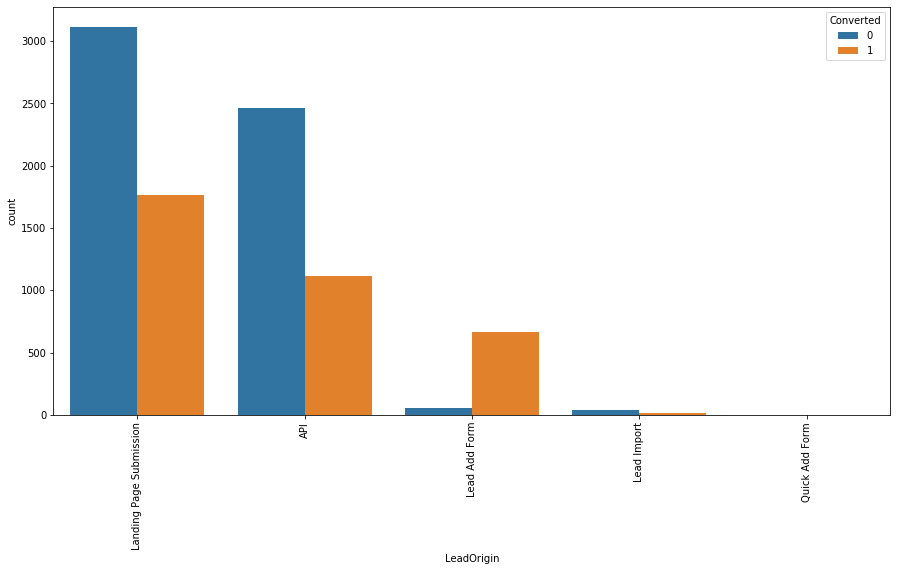

In [23]:
# lead Origin
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "LeadOrigin", hue = "Converted", data = leads_df)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

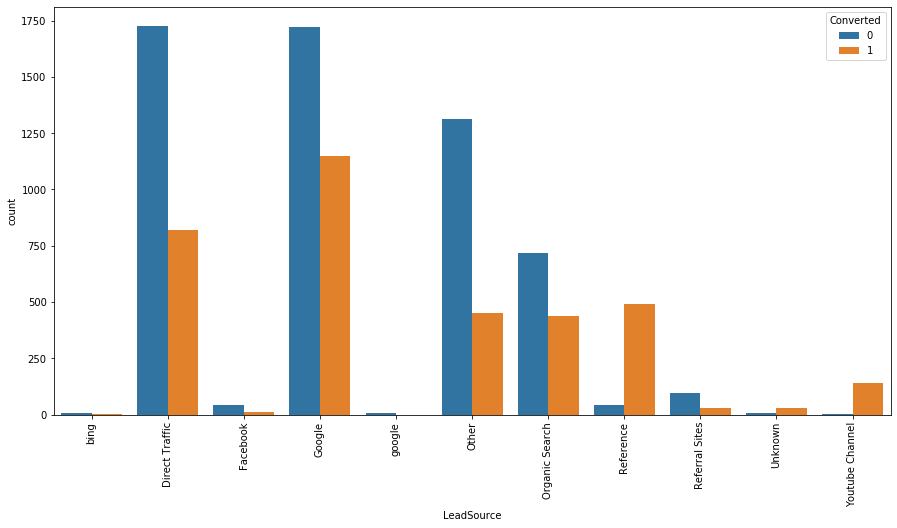

In [24]:
# lead source
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "LeadSource", hue = "Converted", data = leads_df)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

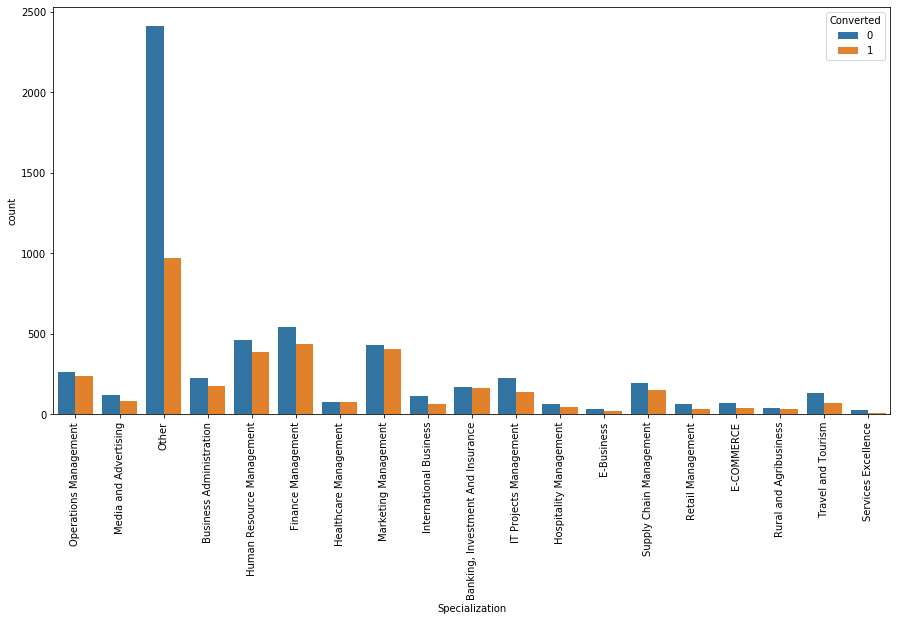

In [25]:
# Specialization
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Specialization", hue = "Converted", data = leads_df)
xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

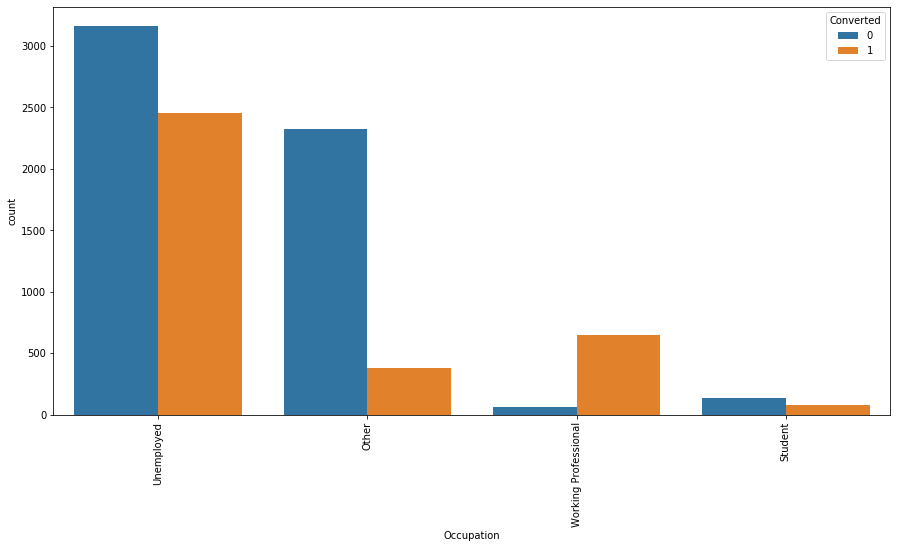

In [26]:
# Occupation
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Occupation", hue = "Converted", data = leads_df)
xticks(rotation = 90)

For our continuous variables we can look at box plots

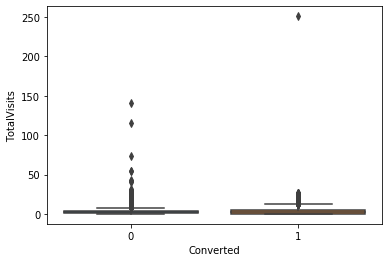

In [27]:
# Total Visits
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df)

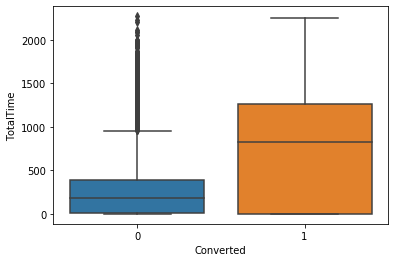

In [28]:
# Total Time Spent on Website
sns.boxplot(y = 'TotalTime', x = 'Converted', data = leads_df)

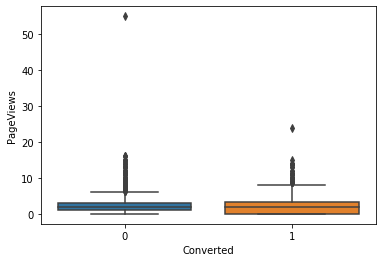

In [29]:
# Page Views Per Visit
sns.boxplot(y = 'PageViews', x = 'Converted', data = leads_df)

What comments can you make about the different variables and their conversion rates? 

## Part 7: Model Building 

Now we have a reasonably good idea about what we want to predict and the relationships in each variable we can start to build a predictive model for our lead score. 

As we said above we have a binary target that we want to predict and a mix of 7 categorical and continuous variables we can use as predictor variables 

Because our target is binary (0 or 1)  - this is a **classification** problem, meaning that we want to predict whether a lead will convert or not. 

So we need to pick a model for classification. The first choice for many binary classification problems is a **logistic regression** model because of its simplicity and interpretability. 

There are other options like **random forests** or **neural networks** that can provide better accuracy, but depending on the data logistic regression can perform very well! 

### Training-testing split

The next part of building a predictive model is to split the data into a **training** set and **testing** set. 
This lets us withhold data from the model when training so that we can test it's performance on data it has not seen before - just like it will be doing for our lead scoring in real life. 

- Train 80% 
- Test 20% 

We also need to transform the data to get it ready for modelling 
- Remove the ID label (not useful as a predictor)
- Split out the target column
- For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [30]:
# package for training models 
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

In [31]:
# vector to store conversion results
y = leads_df['Converted']

In [32]:
# taking catagorical variables and creating dummy variables
# here we have subsetted the dataframe to only the catagorical columns 
dummy1 = pd.get_dummies(leads_df[['LeadOrigin', 'LeadSource', 'Specialization', 'Occupation']], drop_first=True)
dummy1.head()

,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Facebook,LeadSource_Google,LeadSource_Organic Search,LeadSource_Other,LeadSource_Reference,LeadSource_Referral Sites,...,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [33]:
# Adding the results of the dummy variables and remaining continous variables 
# in a dataframe with all the predictors 
X = pd.concat([leads_df[['TotalVisits', 'TotalTime', 'PageViews']], dummy1], axis=1)
X.head()

,TotalVisits,TotalTime,PageViews,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Facebook,LeadSource_Google,LeadSource_Organic Search,...,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,3,138,3.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,3,399,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,88,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,153,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,458,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [34]:
# create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 404)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7392, 38) (7392,)
(1848, 38) (1848,)


Now we are ready to 'fit' our logistic regresion model to the data

In [35]:
# fit a model 
lm = linear_model.LogisticRegression()
model = lm.fit(X_train, y_train)

Easy as that! Two lines of code.

## Part 8: Model Evaluation

Next is the important bit - how good is our model at predicting conversions?

There are many metrics to evaluate a model and two ways we can get estimates 
- 'in-sample' evaluating on our training data 
- 'out of sample' evaluating on our testing data 

In [36]:
# in sample accuracy 
metrics.accuracy_score(y_train, model.predict(X_train))

0.7824675324675324

In [37]:
# Get predictions on testing dataset
y_test_pred = model.predict(X_test)

In [38]:
# Out of of sample accuracy 
# Let's check the overall accuracy for the test set 
metrics.accuracy_score(y_test, y_test_pred)

0.7748917748917749

The in-sample estimate always tends to be higher accuracy - which is why we need to evaluate our model on data it has not seen before to get a true estimate of real life performance! 

### Confusion Matrix 

For classification models we can use a tool called a **confusion matrix** to see how the model performed on classifying non-conversions compared to conversions 

In [39]:
# Confusion matrix 
# imput is the actual conversions vs the predicted conversions for each lead in the test set
confusion = metrics.confusion_matrix(y_test, y_test_pred)

confusion

array([[948, 153],
       [263, 484]], dtype=int64)

One thing we are interested in is how many leads predicted as converters were actually converters and how many predicted as non-converters were actually non converters:

In [40]:
# some more things we can calculate from our confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("True positive", TP)
print("True negative", TN)
print("False Positives", FP)
print("False Negatives", FN)

True positive 484
True negative 948
False Positives 153
False Negatives 263


And the proportions of each:

- **Sensitivity** (also called the true positive rate, the recall) measures the proportion of actual positives that are correctly identified as such.

- **Specificity** (also called the true negative rate) measures the proportion of actual negatives that are correctly identified as such.

In [41]:
# Let's see the sensitivity of our logistic regression model
se = TP / float(TP+FN)
# Let us calculate specificity
sp = TN / float(TN+FP)

# Out of all those who were converters - what proportion did our model get right?
print("Sensitivity", se)
# Out of all those who were non-converters - what proportion did our model get right?
print("Specificity", sp)

Sensitivity 0.6479250334672021
Specificity 0.8610354223433242


The default for predictions is all p > 0.5 are classed as 1 (i.e. conversion) and all p < 0.5 are classed as 0 (non-conversion) 

Depending on what is worse 
- Mis-classifying a non-converter as a converter and calling them by mistake - low specificity
- Mis-classifying a converter as a non-converter and and not calling them - low sensitivity 

We can tune the sensitivity and specificity of our model, by moving this threshold of 0.5 higher or lower. 

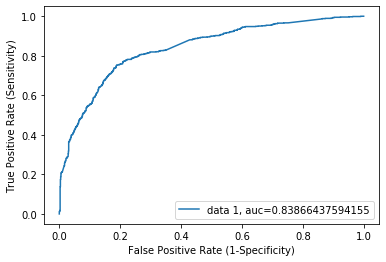

In [42]:
# roc curve 
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.show()

## Part 9: Interpreting Results & Lift

The great thing about logistic regression is it gives us the predicted probabilities of that observation falling into that class (in our case conversion = 0 or conversion = 1). 

We can use this to rank our leads into deciles of the 'hottest' and compare the number of actual conversions in each decile.

Then we can see how this compares to the existing method - or no method. 

In [43]:
# create dataframe 
probs = pd.concat([y_test.reset_index(drop = True), pd.Series(y_pred_proba)], axis = 1)
probs.columns = ['actual', 'prob_c']

# look 
probs.head()

,actual,prob_c
0,0,0.110873
1,1,0.283252
2,0,0.661073
3,0,0.265124
4,0,0.451459


In [44]:
# cut data into decilies 
# i.e. putting the leads into buckets of top 10%, 20%, ... based on how likely they are to convert
probs['deciles'] = pd.qcut(probs.prob_c.rank(method='first'), 10)

In [45]:
probs['deciles'].value_counts()

(1663.3, 1848.0]    185
(1478.6, 1663.3]    185
(1293.9, 1478.6]    185
(924.5, 1109.2]     185
(739.8, 924.5]      185
(370.4, 555.1]      185
(185.7, 370.4]      185
(0.999, 185.7]      185
(1109.2, 1293.9]    184
(555.1, 739.8]      184
Name: deciles, dtype: int64

In [46]:
# compare actual conversion in each decile
# pandas groupby is a useful function for 
lift = probs.groupby(probs.deciles)['actual'].agg(["sum", "count"]).reset_index()

# existing conversion rate in test data
x = sum(lift['sum'])/sum(lift['count'])

# calculate conversion probs
lift['prob_con'] = lift['sum']/lift['count']

# get cumulative counts and probabilities 
lift['sum_c'] = lift['sum'].iloc[::-1].cumsum()
lift['prop_c'] = lift['sum_c']/731

# old model - 40% conversion by random selection
lift['old'] = lift['count']*x

In [47]:
# dataframe with our metrics 
lift

,deciles,sum,count,prob_con,sum_c,prop_c,old
0,"(0.999, 185.7]",12,185,0.064865,747,1.021888,74.780844
1,"(185.7, 370.4]",22,185,0.118919,735,1.005472,74.780844
2,"(370.4, 555.1]",28,185,0.151351,713,0.975376,74.780844
3,"(555.1, 739.8]",32,184,0.173913,685,0.937073,74.376623
4,"(739.8, 924.5]",46,185,0.248649,653,0.893297,74.780844
5,"(924.5, 1109.2]",64,185,0.345946,607,0.830369,74.780844
6,"(1109.2, 1293.9]",110,184,0.597826,543,0.742818,74.376623
7,"(1293.9, 1478.6]",118,185,0.637838,433,0.592339,74.780844
8,"(1478.6, 1663.3]",144,185,0.778378,315,0.430917,74.780844
9,"(1663.3, 1848.0]",171,185,0.924324,171,0.233926,74.780844


### Waterfall Plot

This plot shows us for each decile (ordered 'hottest' to 'not hot' leads) how many conversions we would expect to get by contacting leads in each decile compared to when we just pick leads at random that have a 38% conversion rate. 

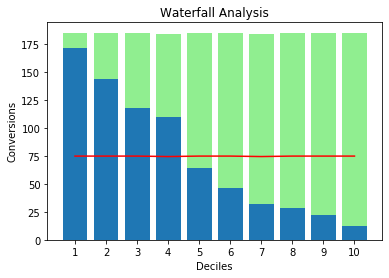

In [48]:
# Waterfall analysis plot 
ax = plt.gca()

ax.bar(lift.index, lift['count'].iloc[::-1], color = 'lightgreen')
ax.bar(lift.index, lift['sum'].iloc[::-1])
ax.plot(lift.index, lift['old'].iloc[::-1], color = 'red')
plt.xticks(lift.index, labels=lift.index+1)
plt.title("Waterfall Analysis")
plt.xlabel("Deciles")
plt.ylabel("Conversions")

plt.show()

We can see that our model puts our more likely converters in the top deciles. This means that the sales team has a way of prioritising leads
1. Top 10% of leads are 98% likely to convert so they should always be at the top of the queue 
2. Middle % of leads might still convert but less of a priority 
3. Bottom 30% of leads are very unlikely to convert - don't waste time and resource here! Ignore them! 

*Next idea - can you work out those in the top decile who might convert on without even needing a sales call? - AB testing* 

### Lift plot

Here we compare the cumulative gains in converted customers we get from our model compared to what we get by calling leads randomly. 

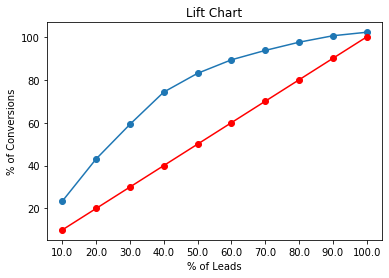

In [49]:
# Lift plot
ax = plt.gca()

d = np.linspace(0.1,1,10).round(1)

ax.plot(lift.index, lift['prop_c'].iloc[::-1]*100, marker='o')
ax.plot(lift.index, d*100, color = 'red', marker='o')
plt.xticks(lift.index, labels=d*100)
plt.title("Lift Chart")
plt.xlabel("% of Leads")
plt.ylabel("% of Conversions")

plt.show()

This chart shows us that by contacting just the top 10% of leads we actually capture 24% of all conversions. 

This is compared to having no model where we will only get 10% of all conversions for every 10% of leads we contact. 

We only need to contact the top 70% leads from our model to capture 95% of all conversions. 

This model shows we can convert more leads without making more calls! We just have to call the right people in the right order!

# Part 10: Next steps

You could try improve model accuracy by:
- Try a different model
- Transform variables
- Variable selection
- Tune hyperparameters 
- Adding new data 

Model building is an iterative process until you reach the level of accuracy required 